# Importing Libraries and Setup
    1) Importing the important libraries
    2) limiting the memory growth to avoid OOM errors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings("ignore")

2024-06-16 14:05:39.377844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 14:05:39.378004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 14:05:39.620814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#avoid OOM errors (Out of Space Errors)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading The Data 
    1) we are here loading the data that contains all the images
    2) we are taking a batch from our image and then doing subplots for our images

In [3]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/happyorsad/data')

Found 514 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

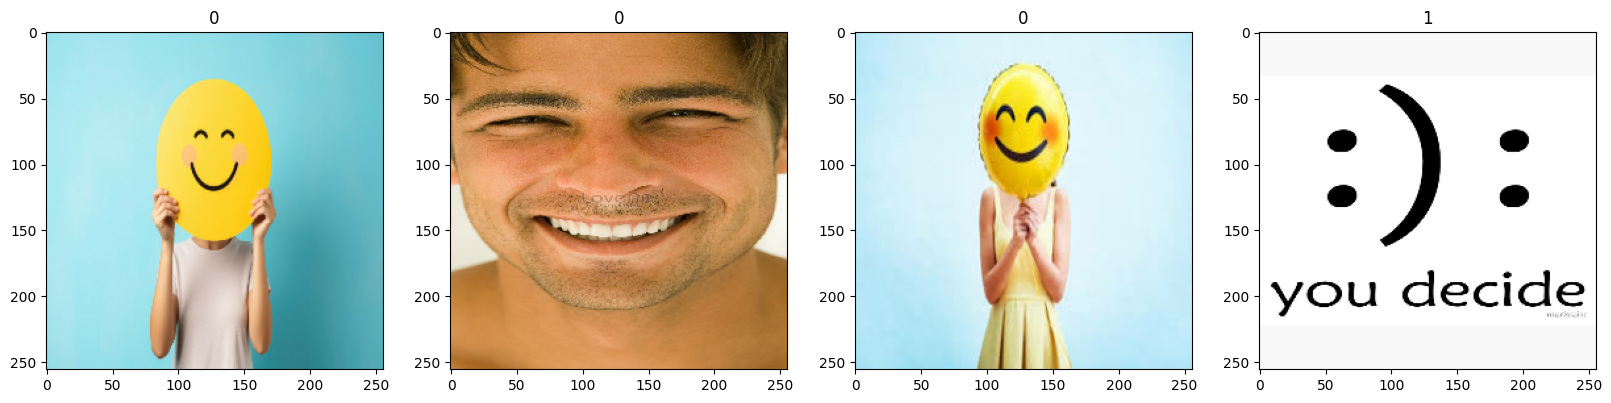

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Image Preprocessing
    we are here scaling our data from range between 0 and 255 to between 0 and 1
    

In [7]:
#scaling
data = data.map(lambda x, y : (x / 255, y))

# Splitting The Data 
    1) we have 17 batches and each batch contains 32 images and we want to split the data to train, validation and testing
    2) we made sure that the sum of the sizes of train, validation and testing is 17

In [8]:
#number of batches
len(data)

17

In [9]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1) + 1

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Learning Models

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model2 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])



model3 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    


model4 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.7),
        layers.Dense(1, activation='sigmoid')
    ])
    


model5 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
        layers.Conv2D(32, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

# Compile the models
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,548,257 (116.53 MB)

 Trainable params: 30,548,257 (116.53 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 250, 250, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 123, 123, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 119, 119, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 222784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    28,516,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,664,097 (109.34 MB)

 Trainable params: 28,664,097 (109.34 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6961 - loss: 0.9456 - val_accuracy: 0.7422 - val_loss: 0.5272
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7503 - loss: 0.5398 - val_accuracy: 0.7500 - val_loss: 0.5134
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7880 - loss: 0.4539 - val_accuracy: 0.7656 - val_loss: 0.4669
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7636 - loss: 0.4870 - val_accuracy: 0.7344 - val_loss: 0.4501
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8241 - loss: 0.3817 - val_accuracy: 0.8203 - val_loss: 0.3371
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8455 - loss: 0.3095 - val_accuracy: 0.8750 - val_loss: 0.2442
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8498 - loss: 0.3369 - val_accuracy: 0.8750 - val_loss: 0.2688
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9331 - loss: 0.2269 - val_accuracy: 0.9141 - val_loss:

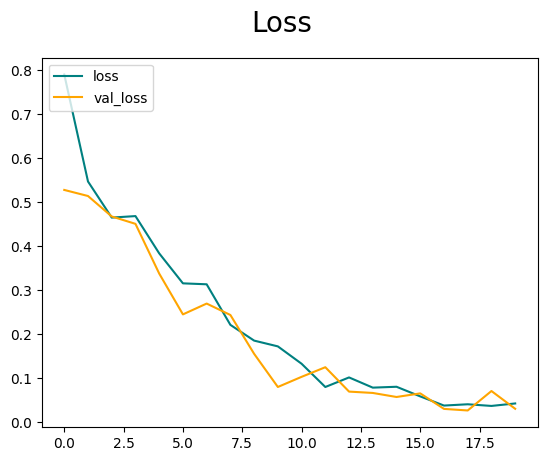

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

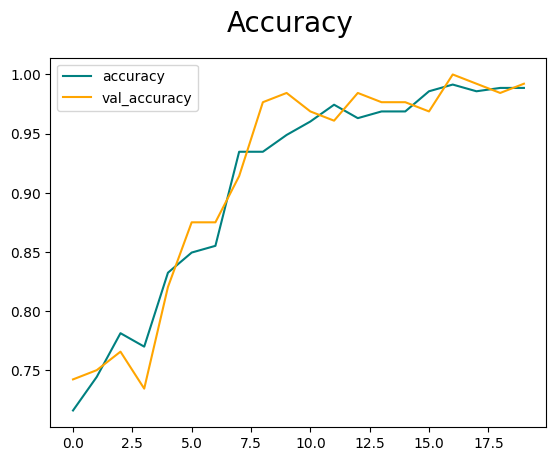

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
hist2 = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5930 - loss: 4.2954 - val_accuracy: 0.7109 - val_loss: 0.5828
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7250 - loss: 0.6107 - val_accuracy: 0.7422 - val_loss: 0.5787
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7451 - loss: 0.5761 - val_accuracy: 0.6953 - val_loss: 0.5254
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7725 - loss: 0.4533 - val_accuracy: 0.7656 - val_loss: 0.4303
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7871 - loss: 0.4186 - val_accuracy: 0.7969 - val_loss: 0.3707
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8074 - loss: 0.3787 - val_accuracy: 0.8438 - val_loss: 0.2918
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8698 - loss: 0.3260 - val_accuracy: 0.9219 - val_loss: 0.1825
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9049 - loss: 0.2555 - val_accuracy: 0.9844 - val_loss:

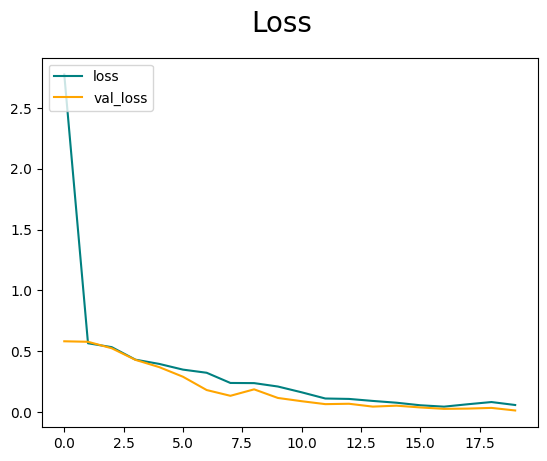

In [24]:
fig2 = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig2.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

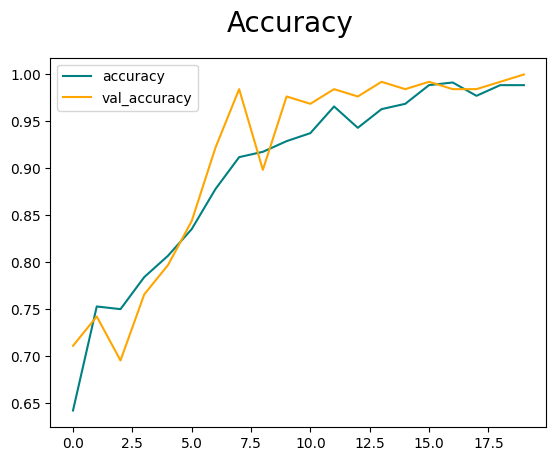

In [25]:
fig2 = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig2.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
hist3 = model3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.6613 - loss: 2.3374 - val_accuracy: 0.8438 - val_loss: 0.4467
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.7432 - loss: 0.5649 - val_accuracy: 0.7500 - val_loss: 0.5192
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.7553 - loss: 0.5620 - val_accuracy: 0.7344 - val_loss: 0.5423
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.7393 - loss: 0.5680 - val_accuracy: 0.8359 - val_loss: 0.3923
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.7558 - loss: 0.5217 - val_accuracy: 0.7500 - val_loss: 0.5004
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.7851 - loss: 0.4663 - val_accuracy: 0.7891 - val_loss: 0.3903
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8076 - loss: 0.4402 - val_accuracy: 0.8281 - val_loss: 0.4641
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8232 - loss: 0.4295 - val_accuracy: 0.8984 - val_loss:

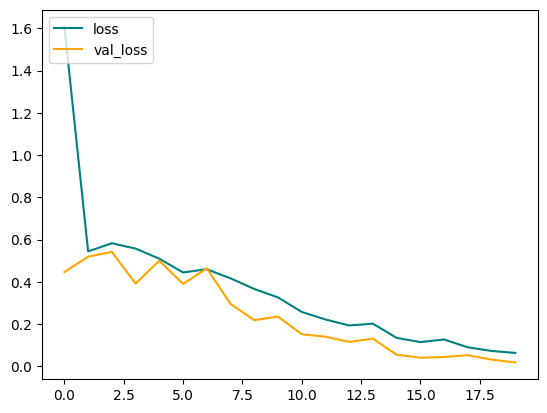

In [27]:
fig3 = plt.figure()
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
fig2.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

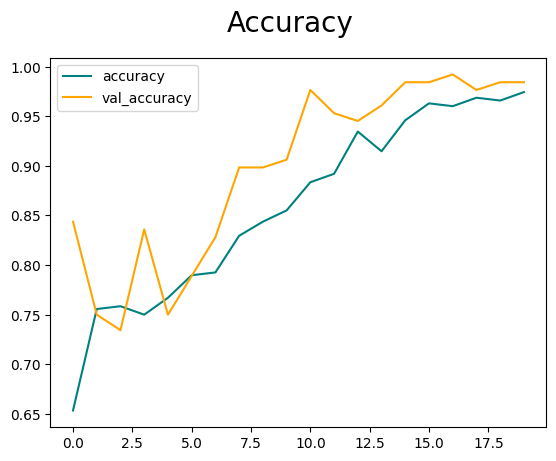

In [28]:
fig3 = plt.figure()
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
fig3.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
hist4 = model4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6288 - loss: 3.5540 - val_accuracy: 0.7344 - val_loss: 0.5336
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7372 - loss: 0.5666 - val_accuracy: 0.7656 - val_loss: 0.4727
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7829 - loss: 0.5010 - val_accuracy: 0.7969 - val_loss: 0.4691
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7700 - loss: 0.5447 - val_accuracy: 0.8750 - val_loss: 0.3133
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7734 - loss: 0.4387 - val_accuracy: 0.8516 - val_loss: 0.3271
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7816 - loss: 0.4465 - val_accuracy: 0.7734 - val_loss: 0.3903
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8139 - loss: 0.3763 - val_accuracy: 0.8750 - val_loss: 0.2607
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8703 - loss: 0.2820 - val_accuracy: 0.8672 - val_loss:

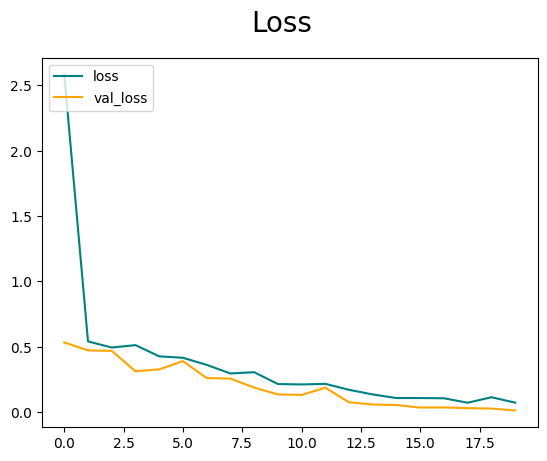

In [30]:
fig4 = plt.figure()
plt.plot(hist4.history['loss'], color='teal', label='loss')
plt.plot(hist4.history['val_loss'], color='orange', label='val_loss')
fig4.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

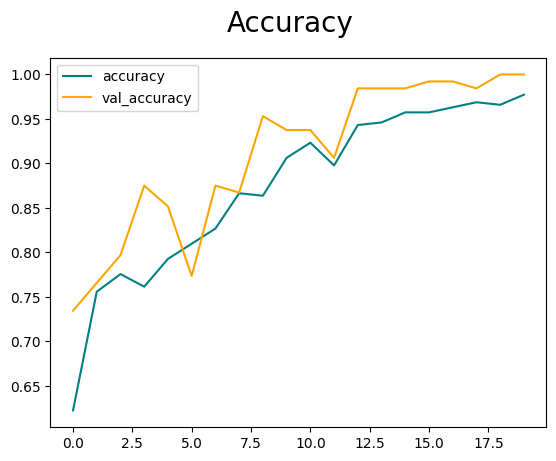

In [31]:
fig4 = plt.figure()
plt.plot(hist4.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist4.history['val_accuracy'], color='orange', label='val_accuracy')
fig4.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
hist5 = model5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 126s 11s/step - accuracy: 0.6838 - loss: 1.5534 - val_accuracy: 0.7422 - val_loss: 0.5686
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.7317 - loss: 0.5908 - val_accuracy: 0.7969 - val_loss: 0.4744
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.7064 - loss: 0.6162 - val_accuracy: 0.6875 - val_loss: 0.5345
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 122s 11s/step - accuracy: 0.7925 - loss: 0.5065 - val_accuracy: 0.7891 - val_loss: 0.4926
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.7333 - loss: 0.5629 - val_accuracy: 0.7656 - val_loss: 0.4910
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.7636 - loss: 0.4904 - val_accuracy: 0.7422 - val_loss: 0.5423
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.7251 - loss: 0.5443 - val_accuracy: 0.7656 - val_loss: 0.4598
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 124s 11s/step - accuracy: 0.7254 - loss: 0.5325 - val_accuracy: 0.

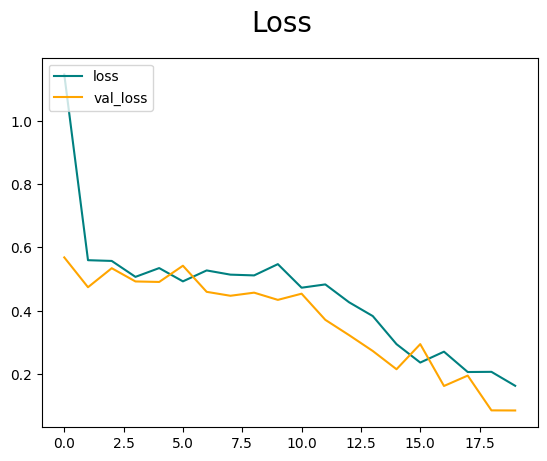

In [33]:
fig5 = plt.figure()
plt.plot(hist5.history['loss'], color='teal', label='loss')
plt.plot(hist5.history['val_loss'], color='orange', label='val_loss')
fig5.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

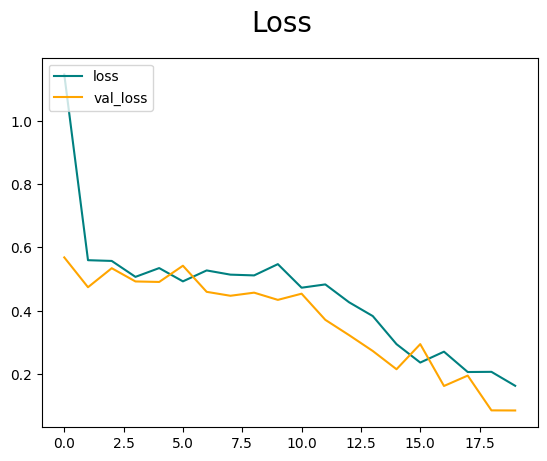

In [34]:
fig5 = plt.figure()
plt.plot(hist5.history['loss'], color='teal', label='loss')
plt.plot(hist5.history['val_loss'], color='orange', label='val_loss')
fig5.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# MODEL 1 EVALUATION

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# MODEL 2 EVALUATION

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model2.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.94736844, shape=(), dtype=float32) tf.Tensor(0.94736844, shape=(), dtype=float32) tf.Tensor(0.9705882, shape=(), dtype=float32)


# MODEL 3 EVALUATION

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model3.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.98039216, shape=(), dtype=float32)


# MODEL 4 EVALUATION

In [42]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model4.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9722222, shape=(), dtype=float32) tf.Tensor(0.9722222, shape=(), dtype=float32) tf.Tensor(0.9852941, shape=(), dtype=float32)


# MODEL 5 EVALUATION

In [44]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model5.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.97727275, shape=(), dtype=float32) tf.Tensor(0.95555556, shape=(), dtype=float32) tf.Tensor(0.9823529, shape=(), dtype=float32)


# MODEL 1 TESTING

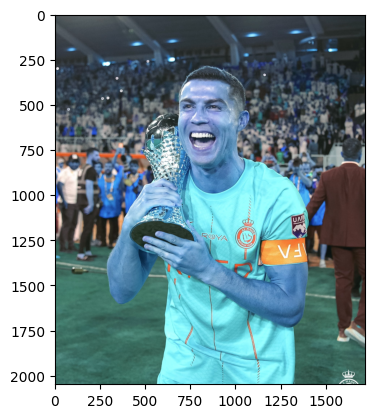

In [46]:
img = cv2.imread('/kaggle/input/happyorsad-images/test/GOAT.jpg')
plt.imshow(img)
plt.show()

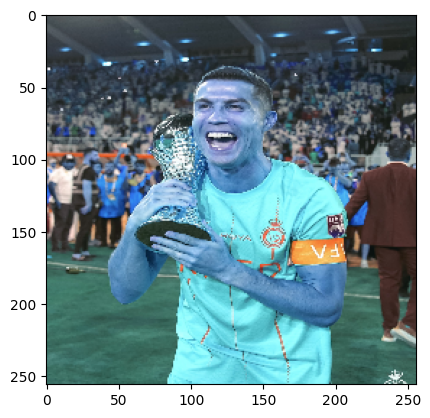

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


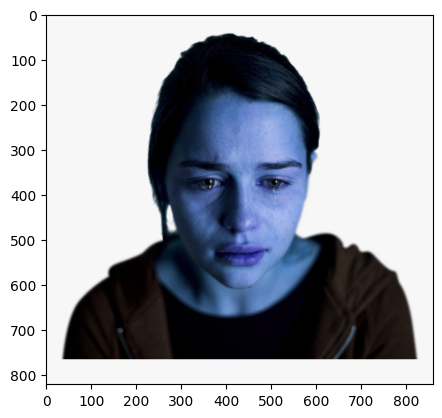

In [50]:
img2 = cv2.imread('/kaggle/input/happyorsad-images/test/sadd.png')
plt.imshow(img2)
plt.show()

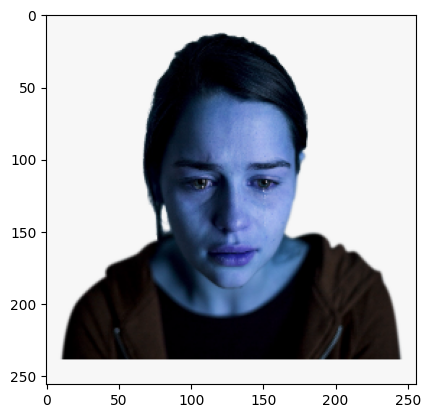

In [51]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [52]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [53]:
if yhat2 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


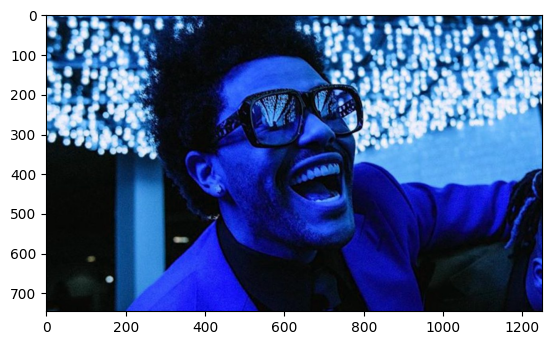

In [54]:
img3 = cv2.imread('/kaggle/input/happyorsad-images/test/The-Weeknd-1.jpg')
plt.imshow(img3)
plt.show()

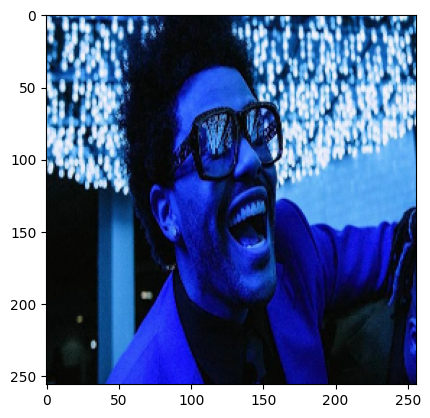

In [55]:
resize3 = tf.image.resize(img3, (256,256))
plt.imshow(resize3.numpy().astype(int))
plt.show()

In [56]:
yhat3 = model.predict(np.expand_dims(resize3/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [57]:
if yhat3 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


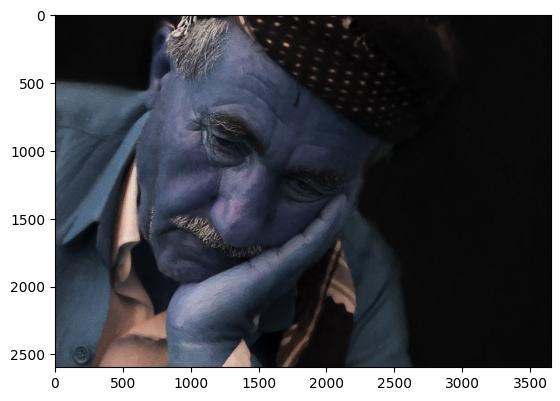

In [58]:
img4 = cv2.imread('/kaggle/input/happyorsad-images/test/oldman.jpg')
plt.imshow(img4)
plt.show()

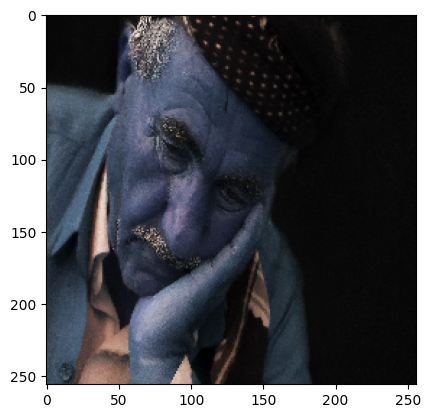

In [59]:
resize4 = tf.image.resize(img4, (256,256))
plt.imshow(resize4.numpy().astype(int))
plt.show()

In [60]:
yhat4 = model.predict(np.expand_dims(resize4/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [61]:
if yhat4 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
